In [1]:
from model import CRNN
from Dataset.CropDataset import CropDataset, GeneratedDataset
from transforms import get_transforms
import torch
import string
import matplotlib.pyplot as plt

alphabet = 'ABEKMHOPCTYX' + '0123456789' + '-'

MODEL_PARAMS = {
    'image_height': 32,
    'number_input_channels': 1,
    'number_class_symbols': len(alphabet),
    'rnn_size': 64
}

model_data = torch.load('logs/checkpoints/best_full.pth')
model = CRNN(**MODEL_PARAMS)
model.load_state_dict(model_data['model_state_dict'])

device=torch.device('cpu:0')

#dataset = CropDataset(transforms=get_transforms(device), cached=False)
dataset = GeneratedDataset(transforms=get_transforms(device), cached=False)

In [2]:
len(dataset.Train)

3503

In [3]:
ds = dataset.Test[50]
ds[0].shape

(1, 32, 80)

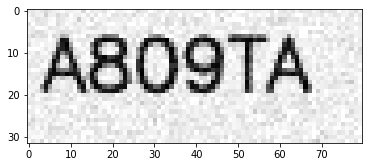

In [4]:
plt.imshow(ds[0][0], cmap='gray')

In [5]:
result = model(torch.Tensor([ds[0]]))
result.shape, len(alphabet)

(torch.Size([22, 1, 23]), 23)

In [6]:
values, indexes = result.max(0)

print(values)
print(indexes)

tensor([[-9.5367e-07, -3.0547e-03, -9.2920e+00, -4.2347e+00, -2.8815e+00,
         -9.8019e+00, -8.3304e+00, -8.6453e+00, -6.7569e+00, -8.1575e+00,
         -3.3866e-03, -5.8896e+00, -1.1262e+01, -1.0008e-01, -1.0192e+01,
         -1.0641e+01, -2.4241e+00, -8.8531e+00, -5.5614e+00, -8.3407e+00,
         -8.5655e+00, -7.8981e-04, -3.6272e-03]], grad_fn=<MaxBackward0>)
tensor([[ 2,  0, 21, 21, 21,  7, 21, 21, 21, 20, 20, 20, 21,  7, 21,  7,  7,  4,
          7, 10,  7,  4, 10]])


In [7]:
indexes = indexes.numpy()[0]
indexes

array([ 2,  0, 21, 21, 21,  7, 21, 21, 21, 20, 20, 20, 21,  7, 21,  7,  7,
        4,  7, 10,  7,  4, 10])

In [8]:
from converter import strLabelConverter

converter = strLabelConverter(alphabet)

preds_size = torch.IntTensor([result.size(0)] * 1)
_, preds = result.max(2)
preds = preds.transpose(1, 0).contiguous().view(-1)
sim_preds = converter.decode(preds, preds_size, raw=False)

res = "".join([alphabet[i] for i in indexes])
res, sim_preds

('EA999P9998889P9PPMPYPMY', 'A809TA')